# Proyecto: Modelo de Machine Learning - Hospitalización

En el presente informe se realiza un estudio sobre los datos de un conjunto de pacientes de un centro de Salud, donde se intentará determinar las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en hospitalización, de modo de poder establecer un modelo de aprendizaje automático que prediga si el paciente tendrá riesgos de hospitalización o no en caso de presentarse esas características.

In [2]:
# En primer lugar, se importan las librerías necesarias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## Procesamiento de datos:

In [3]:
# Se cargan los datos en un DataFrame de Pandas:
df = pd.read_excel('BBDD_Hospitalización.xlsx')
df.head()

c:\Users\Javi Dichiachio\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3


In [4]:
# Se analiza la información del mismo:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [5]:
# Se controlan los nombres de columnas:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [6]:
# Se acortan los mismos:
df = df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'Dias_Post_Infeccion',
                        'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'Antibiotico_utilizado',
                        'HOSPITALIZACIÓN ULTIMO MES':'Hosp_ult_mes',
                        'NUMERO DE MUESTRAS TOMADAS': 'Muestras_tomadas',
                        'ENF. CRONICA PULMONAR OBSTRUCTIVA':'Enfermedad_pulmonar',
                        'DIAS HOSPITALIZACION MQ':'Dias_Hosp_MQ',
                        'DIAS HOSPITALIZACIÓN UPC':'Dias_Hosp_UPC'})
df

,EDAD,DIABETES,Hosp_ult_mes,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico_utilizado,Muestras_tomadas,CUP,Enfermedad_pulmonar,BIOPSIA,Dias_Post_Infeccion,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,Dias_Hosp_MQ,Dias_Hosp_UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
564,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
565,69,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
566,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0


Luego se eliminan las columnas que no formaran parte del modelo de predicción que son las que brindan información posterior al objeto del modelo, que es la hospitalización del paciente luego de la infección:

In [7]:
df = df.drop(columns = ["Dias_Post_Infeccion","Dias_Hosp_MQ", "Dias_Hosp_UPC"])

Se observa que el dataset posee 568 filas, de las cuales algunas poseen valores faltantes, por lo que se chequea la cantidad de los mismos:

In [8]:
print(df.isnull().sum())

EDAD                      0
DIABETES                  0
Hosp_ult_mes              0
PSA                       4
BIOPSIAS PREVIAS          2
VOLUMEN PROSTATICO        1
Antibiotico_utilizado     0
Muestras_tomadas          0
CUP                       1
Enfermedad_pulmonar       2
BIOPSIA                   0
FIEBRE                    0
ITU                       0
TIPO DE CULTIVO           0
AGENTE AISLADO           17
PATRON DE RESISTENCIA     0
HOSPITALIZACION           3
dtype: int64


Se observa que tan sólo 7 columnas poseen **valores faltantes**, casi en todos los casos menos de 5 datos por columna, a excepción de la columna "Agente Aislado", que posee 17 valores faltantes. Como dicha columna incluye datos categóricos que dependen de la situación particular del paciente, no sería correcto reemplazarlos por otro valor, por lo que se decide **eliminarlos** a todos del análisis:

In [9]:
df = df.dropna()
df.shape

(541, 17)

Luego se procede a analizar los **valores estadísticos** y **distribución** de las variables numéricas:

In [10]:
# Valores estadísticos:
df.describe()

,EDAD,PSA,Muestras_tomadas
count,541.000000,541.000000,541.000000
mean,63.879852,13.391257,12.987061
std,9.389434,15.946475,3.942858
min,39.000000,0.600000,4.000000
25%,59.000000,5.600000,12.000000
50%,64.000000,8.000000,12.000000
75%,69.000000,15.000000,12.000000
max,151.000000,100.000000,24.000000


c:\Users\Javi Dichiachio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Javi Dichiachio\AppData\Local\Temp\ipykernel_12644\3729569765.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x1000 with 0 Axes>

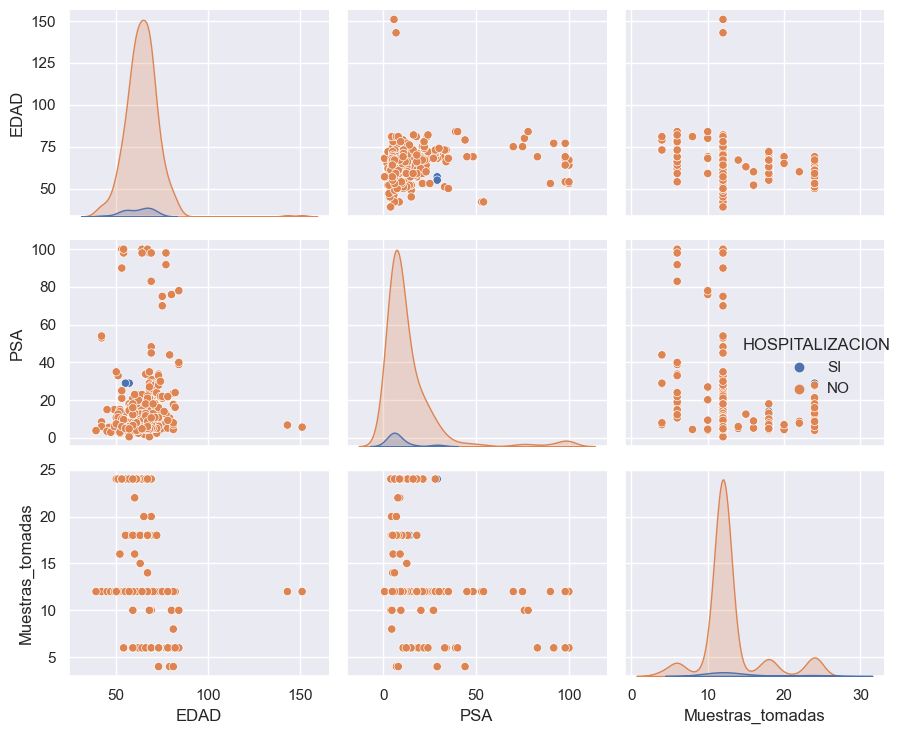

In [11]:
# Distribución:
plt.figure(figsize= (8,10))
sns.pairplot(data=df, hue = 'HOSPITALIZACION')
plt.tight_layout()
plt.show()

Como se observa en los valores estadísticos y en el gráfico anterior, existen valores atípicos dentro de la columna "Edad" (el máximo es 151 años, lo cual es poco probable), por los que se procede a eliminarlos del análisis a través de la regla de las 3 sigmas:

In [12]:
df[df["EDAD"] > 110]

,EDAD,DIABETES,Hosp_ult_mes,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,Antibiotico_utilizado,Muestras_tomadas,CUP,Enfermedad_pulmonar,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
161,143,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO
181,151,NO,NO,5.7,NO,SI,OTROS,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO


In [13]:
#ELIMINACIÓN DE OUTLIERS A TRAVES DEL CRITERIO DE LAS TRES SIGMAS:
#Obtenemos la media y desviación estándar del conjunto de datos:
media = df["EDAD"].mean()
sigma = df["EDAD"].std()

#Definimos los límites mínimos y máximos
sigma_minimo = media - 3 * sigma
sigma_maximo = media + 3 * sigma

#Obtenemos la máscara a aplicar en el dataset:
mascara = (df["EDAD"] >= sigma_minimo) & (df["EDAD"] <= sigma_maximo)

#Luego aplicamos la máscara generada para filtrar el dataset:
df = df[mascara]
df.shape

(539, 17)

Asimismo, se observa que ninguna de las variables numéricas incluidas en el dataset se encuentra altamente correlacionada a la variable objetivo, por lo que no permiten efectuar una clara clasificación entre los pacientes que fueron hospitalizados o no, por lo que se procederá a analizar las variables categóricas y luego realizar su conversión a valores numéricos para incluirlos en nuestro modelo: 

In [14]:
df.columns

Index(['EDAD', 'DIABETES', 'Hosp_ult_mes', 'PSA', 'BIOPSIAS PREVIAS',
       'VOLUMEN PROSTATICO', 'Antibiotico_utilizado', 'Muestras_tomadas',
       'CUP', 'Enfermedad_pulmonar', 'BIOPSIA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION'],
      dtype='object')

In [15]:
# Se crea una lista que incluye las varibles categoricas
col_no_categ = ['EDAD', 'PSA', 'Muestras_tomadas', 'HOSPITALIZACION']
var_categoricas = [x for x in (df.columns) if x not in col_no_categ]
var_categoricas

['DIABETES',
 'Hosp_ult_mes',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'Antibiotico_utilizado',
 'CUP',
 'Enfermedad_pulmonar',
 'BIOPSIA',
 'FIEBRE',
 'ITU',
 'TIPO DE CULTIVO',
 'AGENTE AISLADO',
 'PATRON DE RESISTENCIA']

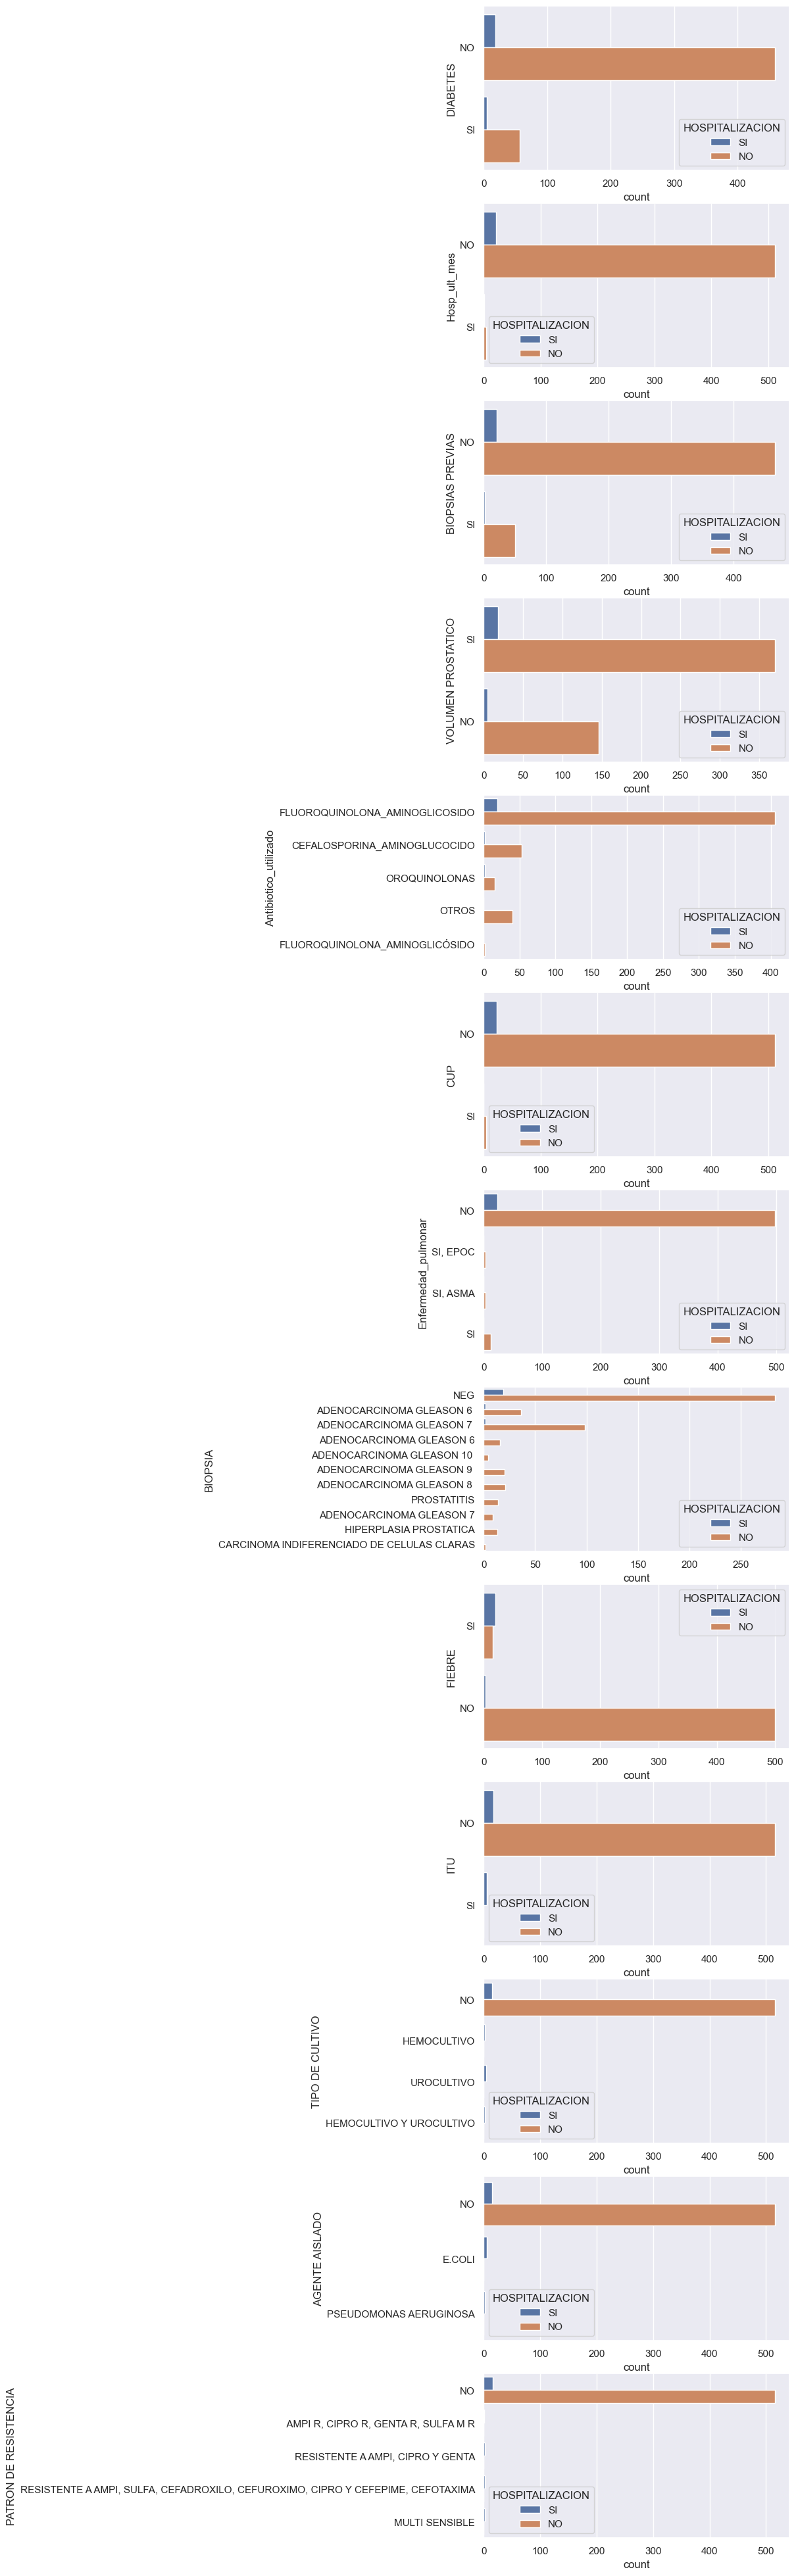

In [16]:
# REPRESENTACION GRAFICA DE VARIABLES CATEGÓRICAS
#Establecemos el tamaño de la figura:
plt.figure(figsize = (6,50))

# Representamos graficamente la frecuencia de las distintas variables, con la variable objetivo como leyenda:
i = 1
for variable in var_categoricas:
    plt.subplot(13,1,i)
    sns.countplot(data = df, y = variable, hue= 'HOSPITALIZACION')
    i += 1


Como se ve en los gráficos anteriores, algunas variables incluidas en el dataset no son relevantes para identificar si el paciente fue hospitalizado o no, por lo que se procede a eliminarlas del análisis:

In [17]:
df = df.drop(columns=["Hosp_ult_mes", "CUP", "BIOPSIAS PREVIAS", "Enfermedad_pulmonar","TIPO DE CULTIVO", "AGENTE AISLADO",
 "PATRON DE RESISTENCIA", "Muestras_tomadas"])
df.head()

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,Antibiotico_utilizado,BIOPSIA,FIEBRE,ITU,HOSPITALIZACION
0,53,NO,4.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,SI,NO,SI
1,56,NO,7.7,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,SI,NO,SI
2,57,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,SI,NO,SI
3,56,NO,7.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,SI,NO,SI
4,55,NO,29.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,SI,NO,SI


Una vez eliminadas las columnas innecesarias, se procede a realizar las transformaciones necesarias para poder incluir los datos en el modelo de clasificación:

In [18]:
# Antes de empezar con las transformaciones en el dataset, se realiza una copia del mismo:
df1 = df.copy()
df1.head()
df1.shape

(539, 9)

In [19]:
# Luego se procede a convertir en numéricas a todas aquellas variables categóricas binarias, empezando por la columna objetivo
# del modelo o target:

# Se importa el label encoder y se instancia el objeto:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Se agrega la columna codificada al df:
df1['HOSPITALIZACION'] = le.fit_transform(df1['HOSPITALIZACION'])
df1['DIABETES'] = le.fit_transform(df1['DIABETES'])
df1['VOLUMEN PROSTATICO'] = le.fit_transform(df1['VOLUMEN PROSTATICO'])
df1['FIEBRE'] = le.fit_transform(df1['FIEBRE'])
df1['ITU'] = le.fit_transform(df1['ITU'])
df1.head()

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,Antibiotico_utilizado,BIOPSIA,FIEBRE,ITU,HOSPITALIZACION
0,53,0,4.0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,1,0,1
1,56,0,7.7,1,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,1,0,1
2,57,0,29.0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,1,0,1
3,56,0,7.0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,1,0,1
4,55,0,29.0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,NEG,1,0,1


In [20]:
# Por último, se convierten las columnas "Antibiótico_utilizado" y "BIOPSIA" en numéricas utilizando la técnica del One Hot Encoder:

df1 = pd.get_dummies(data = df1, columns=["Antibiotico_utilizado", "BIOPSIA"], dtype = int)
print(df1.shape)
df1.head()


(539, 23)


,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,FIEBRE,ITU,HOSPITALIZACION,Antibiotico_utilizado_CEFALOSPORINA_AMINOGLUCOCIDO,Antibiotico_utilizado_FLUOROQUINOLONA_AMINOGLICOSIDO,Antibiotico_utilizado_FLUOROQUINOLONA_AMINOGLICÓSIDO,...,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS
0,53,0,4.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,56,0,7.7,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,57,0,29.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,56,0,7.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,55,0,29.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


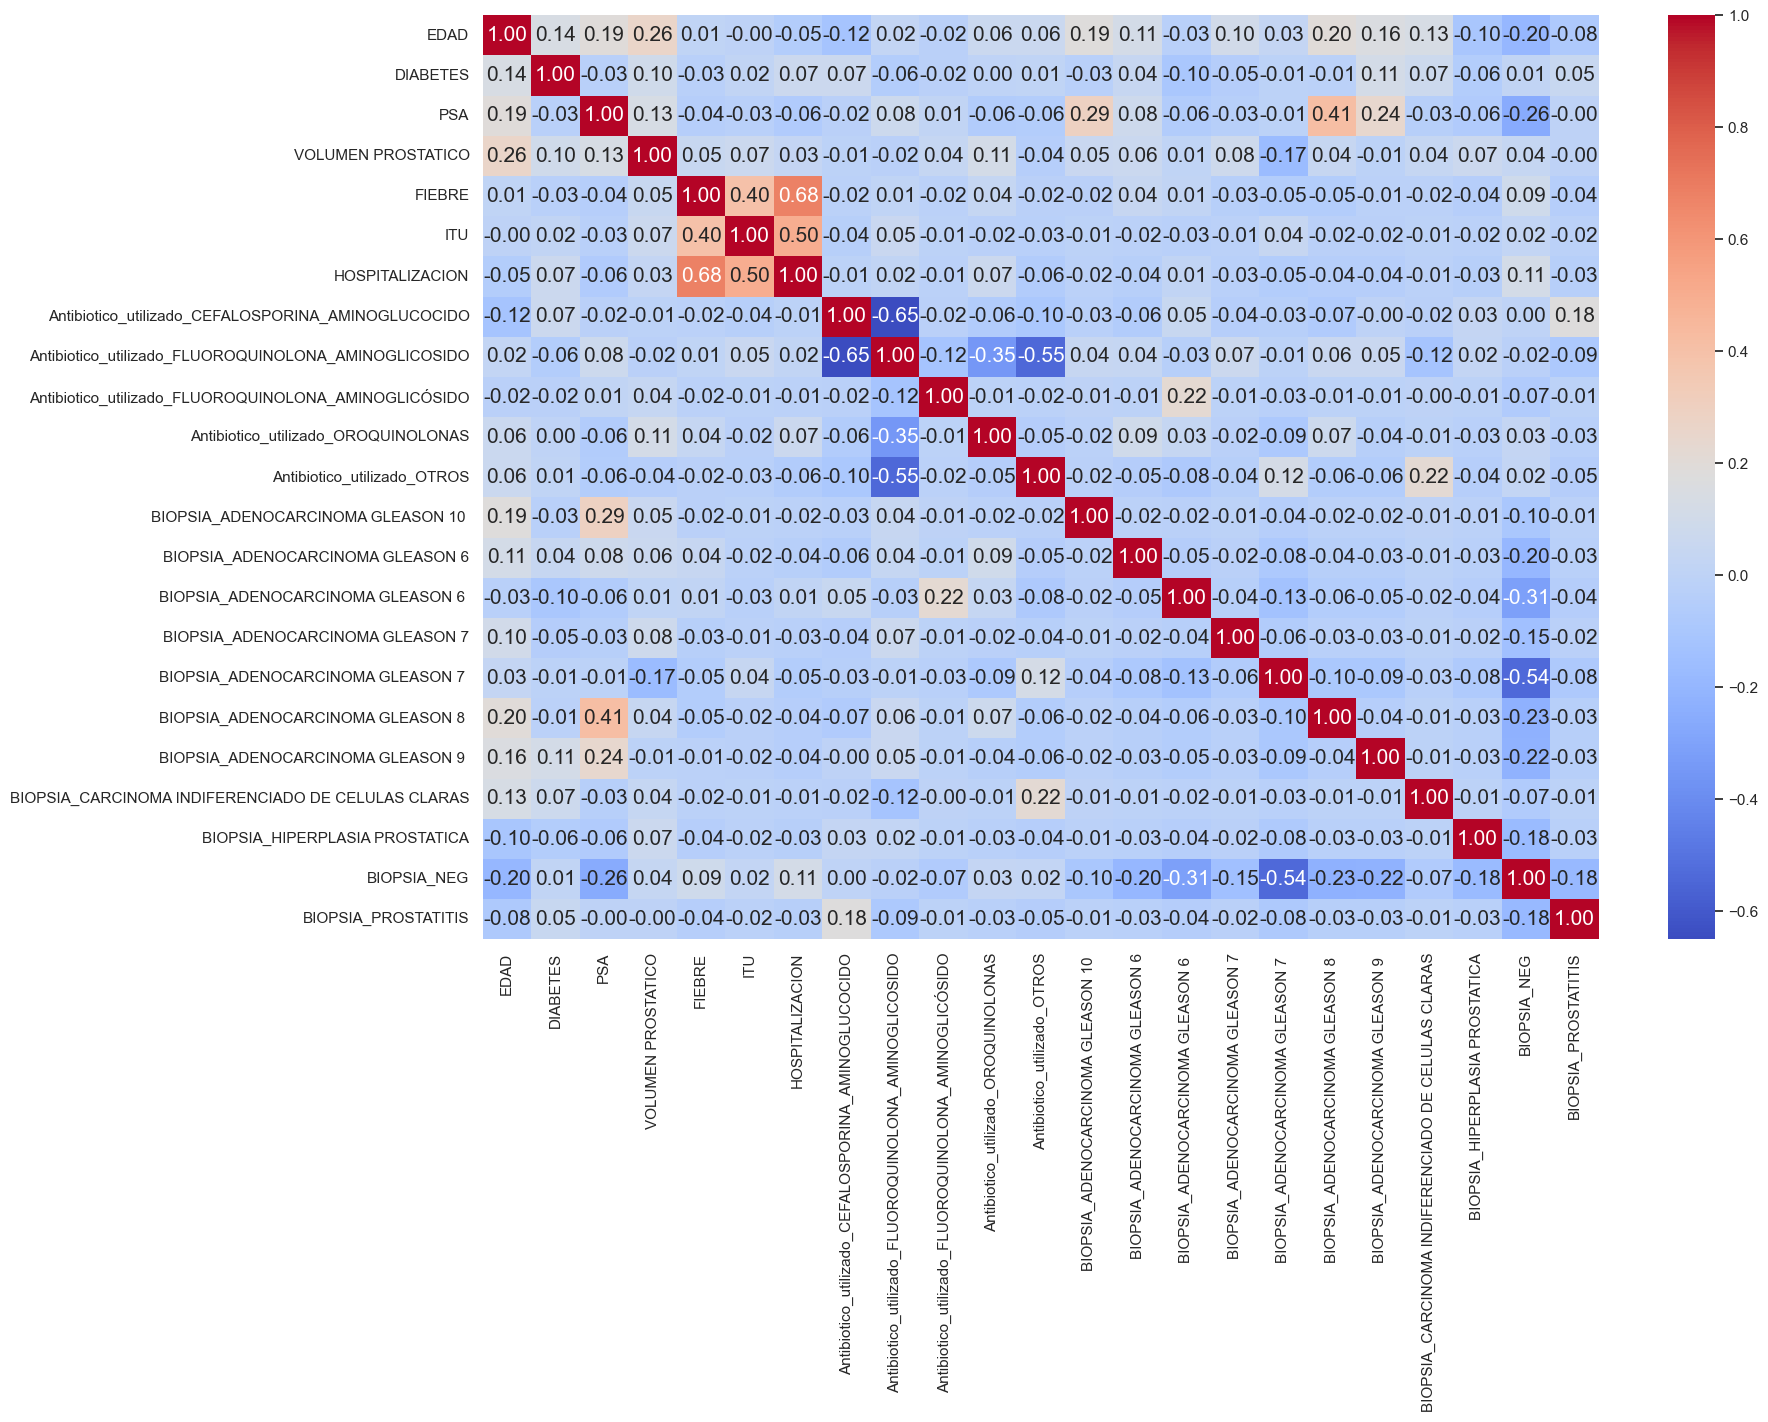

In [21]:
# Calculamos la correlación sobre el DataFrame:
corr = df1.corr()

# Graficamos:
plt.figure(figsize=(18,12))
sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
            ,annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

## Modelamiento:

En esta estapa se buscará encontrar un modelo de Machine Learning que permita realizar una predicción acerca de si el paciente terminará hospitalizado o no luego de la biopsia en función a sus características personales.

En primer lugar, controlamos la proporción de etiquetas en nuestra variable objetivo ("HOSPITALIZACIÓN") para chequear si el dataset se encuentra balanceado:

In [22]:
df1["HOSPITALIZACION"].value_counts()

HOSPITALIZACION
0    516
1     23
Name: count, dtype: int64

Tal cual se observa en el punto anterior, la cantidad de datos de ambas categorías (hospitalizados o no) se encuentra desbalanceada, por lo que se procede a realizar un resampleo de los datos a traves de la técnica SMOTE, que genera mestras aleatorias de la clase minoritaria:

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Seleccionamos las variables predictoras o atributos (X) y la variable a predecir (y):
X = df1.drop(columns="HOSPITALIZACION")     # variables predictoras
y = df1["HOSPITALIZACION"]                  # variable objetivo


# Se crea un contador que nos muestra la cantidad de etiquetas de la variable objetivo:
counter = Counter(y) 
print('Antes', counter)

# Se instancia el objeto SMOTE
smt = SMOTE()

# Se transforman los datos:
X_1, y_1 = smt.fit_resample(X, y)

# Por último, se realiza el recuento para ver como quedaron las etiquetas en la variable objetivo:
counter = Counter(y_1)
print('Después', counter)

Antes Counter({0: 516, 1: 23})
Después Counter({1: 516, 0: 516})


In [24]:
X_1.shape

(1032, 22)

In [25]:
y_1.shape

(1032,)

Luego separamos nuestros datos en los grupos de **entrenamiento (train)** y **prueba (test)** asignando un 80% de los registros al primero:

In [26]:
# Seleccionamos el 80% de los datos de X e y como grupo de entrenamiento (train) y el 20% como grupo de prueba (test) 
# del modelo:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42, stratify=y_1)

# Se imprimen la cantidad de filas y columnas de los nuevos grupos de datos:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(825, 22)
(207, 22)
(825,)
(207,)


Luego creamos una función que nos permitirá entrenar, evaluar y representar gráficamente los resultados de los modelos aplicados:

In [27]:
def aplicar_modelo(modelo,X_train, X_test, y_train, y_test):
    '''Dado un modelo que ingresamos como parámetro, esta función entrena los datos, realiza una predicción sobre los grupos de
    entrenamiento y prueba y luego evalúa el desempeño del mismo sobre ambos grupos'''
    
    # En primer lugar, entrenamos el modelo con los datos de 
    modelo.fit(X_train, y_train)

    # Predecimos la los valores de la variable 'y' sobre los grupos de entrenamiento y prueba:
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Luego evaluamos el modelo utilizando el reporte de clasificación:
    from sklearn.metrics import classification_report
    print("Reporte de Clasificación en Train:\n", classification_report(y_train, y_train_pred))
    print("Reporte de Clasificación en Test:\n", classification_report(y_test, y_test_pred))
    
    # Visualizamos el desempeño del modelo en una matriz de confusión:
    from sklearn.metrics import confusion_matrix
    
    plt.figure(figsize=(12,4))
    # Matriz de confusión para el grupo Train
    plt.subplot(1,2,1)
    matrix = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(data=matrix, annot=True, fmt='d', cbar=False, cmap= "Blues")
    plt.title('Matriz de confusión en Train')
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta real')
    
    # Matriz de confusión para el grupo Test
    plt.subplot(1,2,2)
    matrix_2 = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(data=matrix_2, annot=True, fmt='d', cbar=False, cmap= "Greens")
    plt.title('Matriz de confusión en Test')
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta real')
    
    plt.tight_layout()
    plt.show()

## Métricas de evaluación:

La función creada anteriormente devuelve los resultados del desempeño del modelo en dos grandes partes: por un lado, a través del **reporte de clasificación** podemos observar las siguientes **métricas:**  <br>

     - Exactitud (accuracy): mide la proporción de predicciones correctas sobre el total de muestras; es decir, que tan bien está clasificando el modelo en términos generales.

     - Precision:  mide la proporción de verdaderos positivos entre todas las predicciones positivas; en otras palabras, mide el porcentaje de acierto de las predicciones positivas.

     - Exhaustividad (recall): mide la proporción de verdaderos positivos entre todas las muestras positivas, es decir, mide la capacidad del modelo para identificar correctamente a la clase.
     
En las 3 métricas mencionadas, mientras más **cercano a 1** se encuentre el valor obtenido, mejor será el **desempeño del modelo**.

Por otro lado, la función devuelve **la matriz de confusión**, que nos permiten observar la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos que se utilizan para los cálculos de las métricas descriptas anteriormente.


## Modelo 1: Árbol de decisión

En primer lugar, se entrenará un modelo de **Árbol de decisión** en el cual no se establecerá un valor del hiperparámetro max_depth (profundidad), de modo de encontrar el nivel de profundidad máximo:

Reporte de Clasificación en Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       413

    accuracy                           1.00       825
   macro avg       1.00      1.00      1.00       825
weighted avg       1.00      1.00      1.00       825

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       103

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



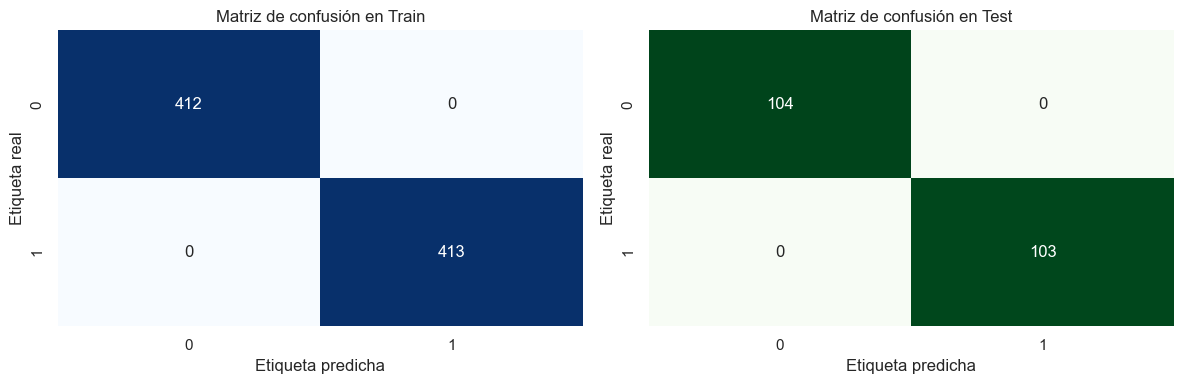

In [28]:
# Importamos el modelo:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos el modelo:
tree = DecisionTreeClassifier(max_depth = None)

# Evaluamos utilizando la función creada anteriormente:
aplicar_modelo(tree,X_train, X_test, y_train, y_test)

De acuerdo a lo expuesto anteriormente, el modelo está obteniendo buenos muy resultados tanto en el grupo de entrenamiento como de prueba, ya que en ambos los valores de la métrica de **exactitud** son iguales o superiores al 0.98 y las métricas de **precision** y **recall** superan el 0.96 para ambas clases, lo cual podría traer aparejado un **sobreajuste**. Por tal motivo, se chequea cuál fue el valor del hiperparámtero **max_depth** que nos está dando estos resultados, para luego probar otras combinaciones posibles de este valor:

In [29]:
print('La cantidad de nodos del modelo clasificador es:' ,tree.tree_.max_depth)

La cantidad de nodos del modelo clasificador es: 15


Segun lo expuesto anteriormente, el máximo nivel de profundidad alcanzado es 13, por lo que a continuación se realizará una comparación del desempeño del modelo en los distintos niveles de profundidad a los fines de encontrar el nivel óptimo:

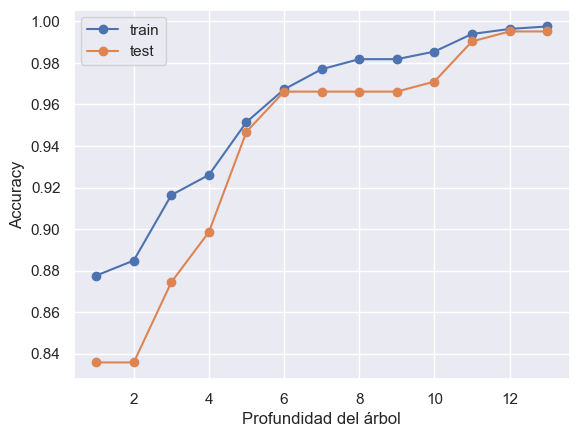

In [30]:
from sklearn.metrics import accuracy_score

# Definimos las listas vacias para los valores de RMSE deseados:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar:
max_depths = list(np.arange(1,14))

# Generamos un loop sobre los distintos valores de profundidad:
for max_depth in max_depths:
        
    # Definir el modelo con el valor de profundidad
    clf_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf_tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf_tree.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf_tree.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(accuracy_train)
    lista_accuracy_test.append(accuracy_test)
    
#Luego analizamos el desempeño del modelo para los distintos valores de profundidad gráficamente:

sns.set()
plt.plot(max_depths,lista_accuracy_train,'o-',label='train')
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
#plt.xticks(np.arange(1,20,2))
plt.legend()
plt.xlabel('Profundidad del árbol');
plt.ylabel('Accuracy');

Como se puede observar en el gráfico anterior, a medida que se incrementa la profundidad (complejidad) del modelo, el índice de **exactitud** se incrementa en los grupos de entrenamiento y prueba, por lo que si bien se observa que el máximo valorm se alcanza con un nivel de profundidad de 12, dejaremos configurado el valor de este hiperparámetro en 10 para evitar el sobreajuste:

Reporte de Clasificación en Train:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       412
           1       0.97      1.00      0.99       413

    accuracy                           0.99       825
   macro avg       0.99      0.99      0.99       825
weighted avg       0.99      0.99      0.99       825

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       104
           1       0.95      0.99      0.97       103

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



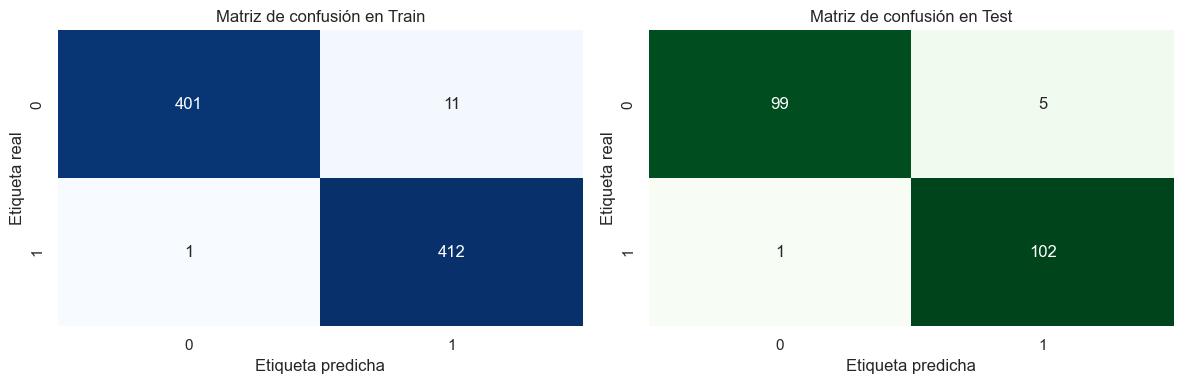

In [31]:
# Instanciamos el modelo:
tree1 = DecisionTreeClassifier(max_depth = 10)

# Evaluamos utilizando la función creada anteriormente:
aplicar_modelo(tree1, X_train, X_test, y_train, y_test)

Como se puede observar en los resultados expuestos, el modelo está clasificando con una **exactitud** del 95 % de los casos, y con una **precisión y exhaustividad** superior al 93 % en ambas clases. El modelo es levemente mejor clasificando a los pacientes que terminan hospitalizados que los que no, pero lo hace con una menor precisión.

Por otro lado, se chequea la importancia de las distintas variables o atributos en la predicción:

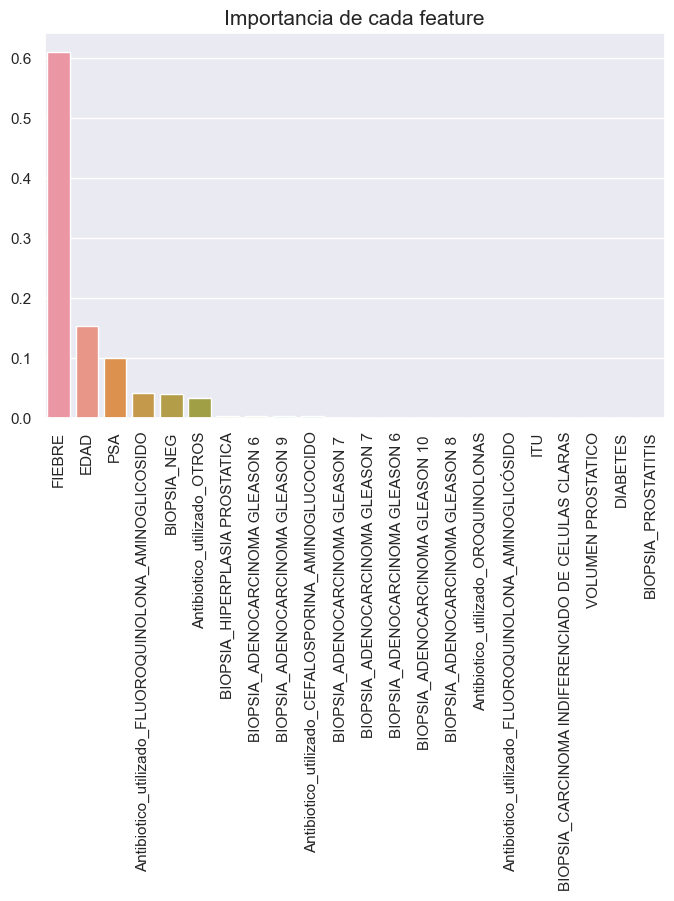

In [32]:
plt.figure(figsize = (8,5))
importances = tree1.feature_importances_
columns = X.columns
indices = np.argsort(importances)[::-1]
sns.barplot(x = columns[indices], y = importances[indices])
plt.title('Importancia de cada feature', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Como se puede observar en el gráfico anterior, las **3 variables más importantes** para realizar la **predicción** de si el paciente necesitará hospitalización o no son: 
    
    - Si el paciente presentó fiebre o no al momento de la infección.
    - La concentración del PSA en la sangre.
    - La edad del paciente.

Como observábamos anteriormente, el hecho de presentar fiebre estaba altamente correlacionado a la Hospitalización del paciente, pero no todos los pacientes que presentaron fiebre terminaron hospitalizados.

No obstante, a los fines de comparar resultados en el desempeño, a continuación se entrenará un nuevo arbol de decisión sin considerar las columnas de FIEBRE e ITU:

In [33]:
#Seleccionamos las variables predictoras o atributos (X) y la variable a predecir (y):
X_modif = df1.drop(columns=["HOSPITALIZACION", "ITU", "FIEBRE"])    # variables predictoras
y_modif = df1["HOSPITALIZACION"]                                    # variable objetivo

# Se instancia el objeto SMOTE
smt = SMOTE()

# Se transforman los datos:
X_2, y_2 = smt.fit_resample(X_modif, y_modif)

Reporte de Clasificación en Train:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       412
           1       0.90      0.99      0.94       413

    accuracy                           0.94       825
   macro avg       0.94      0.94      0.94       825
weighted avg       0.94      0.94      0.94       825

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       104
           1       0.90      0.96      0.93       103

    accuracy                           0.93       207
   macro avg       0.93      0.93      0.93       207
weighted avg       0.93      0.93      0.93       207



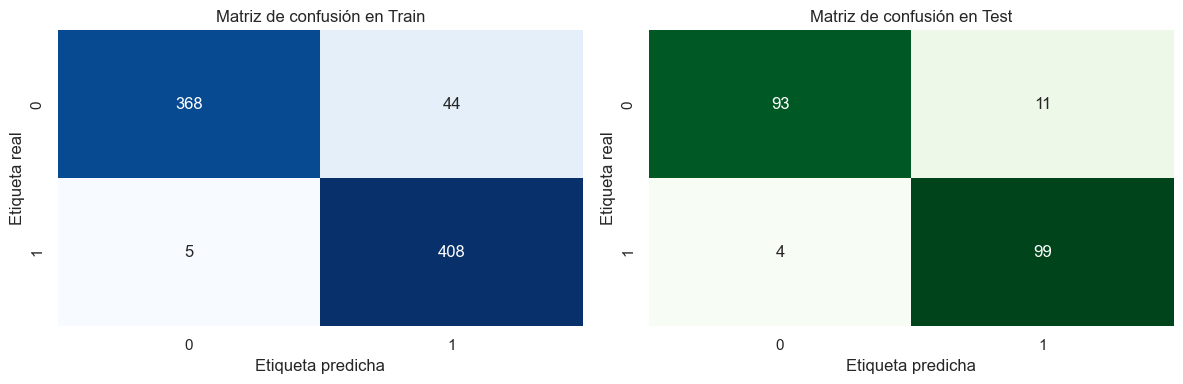

In [34]:
# Se separan los datos en los grupos de entrenamiento y prueba:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_2, y_2, test_size=0.20, random_state=42, stratify=y_2)

# Instanciamos el modelo:
tree2 = DecisionTreeClassifier(max_depth = 10)

# Evaluamos utilizando la función creada anteriormente:
aplicar_modelo(tree2,X_train1, X_test1, y_train1, y_test1)

Como se puede observar en los resultados obtenidos, el desempeño del modelo disminuyó tanto en los datos de entrenamiento como de prueba, obteniendo valores de exactitud del 0.93 y 0.91 respectivamente. Asimismo se observa que el modelo identifica una mayor cantidad de pacientes hospitalizados en ambos grupos, a costo de una menor precisión en la predicción (es decir, está prediciendo casos de más).

Por último, se analizan cúales son las variables más importantes en la predicción:

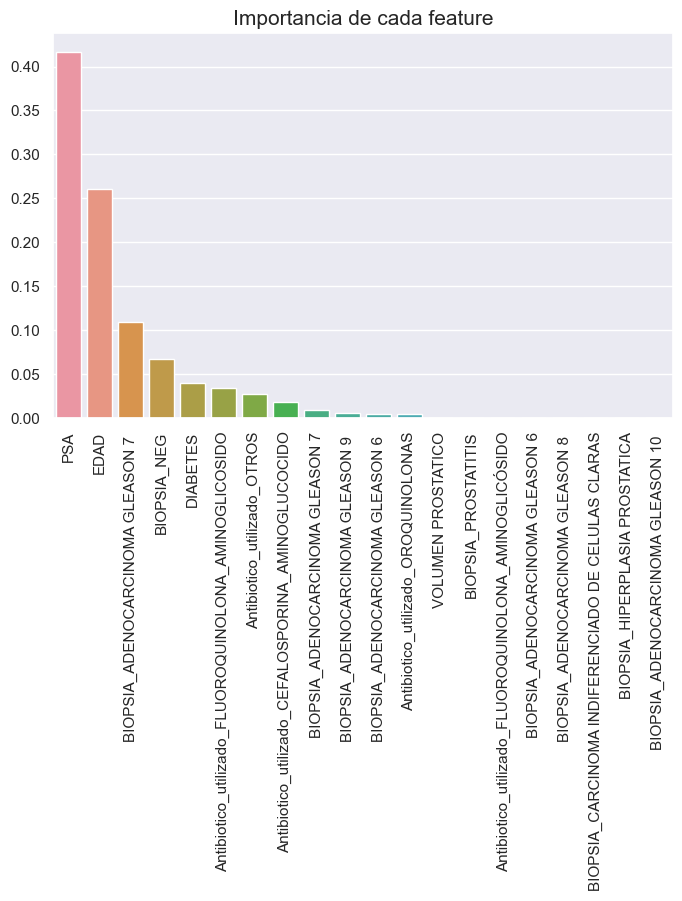

In [35]:
plt.figure(figsize = (8,5))
importances = tree2.feature_importances_
columns = X_modif.columns
indices = np.argsort(importances)[::-1]
sns.barplot(x = columns[indices], y = importances[indices])
plt.title('Importancia de cada feature', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Modelo 2: Vecinos más cercanos

A continuación se entrenará un modelo de clasificación de Vecinos más cercanos, a los fines de comparar los resultados obtenidos por el mismo con los del árbol de decisión descripto anteriormente.

En primer lugar se instanciará un modelo con una cantidad de vecinos arbitraria, y luego se buscará optimizar dicho hiperparámetro a los fines de encontrar un valor que nos brinde los mejores resultados.

Reporte de Clasificación en Train:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       412
           1       0.90      0.99      0.94       413

    accuracy                           0.94       825
   macro avg       0.94      0.94      0.94       825
weighted avg       0.94      0.94      0.94       825

Reporte de Clasificación en Test:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       104
           1       0.81      0.97      0.88       103

    accuracy                           0.87       207
   macro avg       0.89      0.87      0.87       207
weighted avg       0.89      0.87      0.87       207



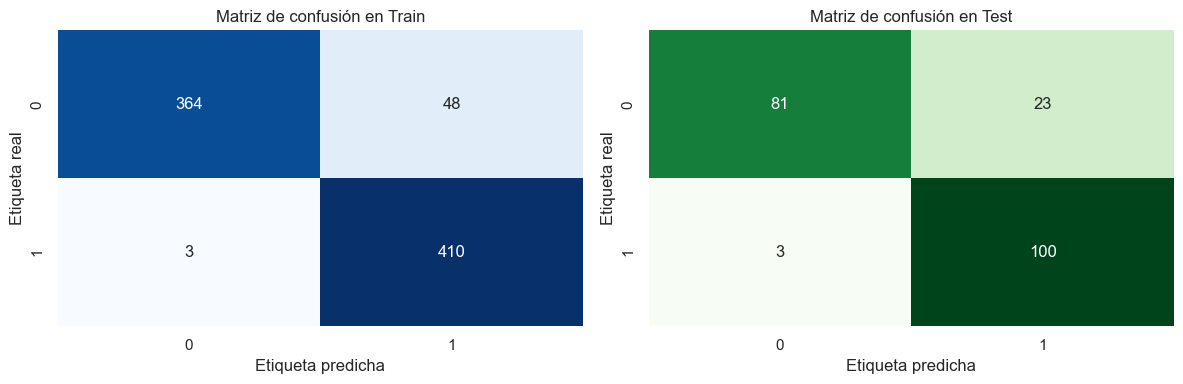

In [36]:
# Importamos e instanciamos el modelo:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

# Evaluamos el modelo considerando todas las variables:
aplicar_modelo(knn,X_train, X_test, y_train, y_test)

Como se observa en los resultados obtenidos, el desempeño del modelo empeora ya que disminuye el valor de todas las métricas.

A continuación se realizará la búsqueda del número de vecinos más adecuado para obtener mejores resultados:

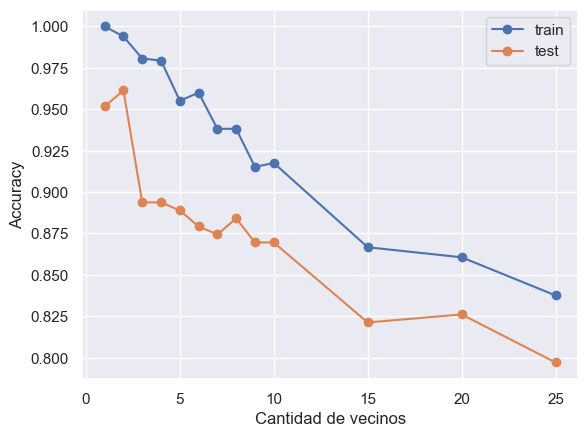

In [38]:
# Definimos las listas vacias para los valores de accuracy deseados:
lista_acc_train1 = []
lista_acc_test1 = []

# Definimos la lista de valores de k (número de vecinos) que vamos a explorar:
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25]

# Generamos en loop sobre los distintos valores de k: 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    clf_KNN = KNeighborsClassifier(n_neighbors = k)
    
    # Entrenar el modelo
    clf_KNN.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred2 = clf_KNN.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred2)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred2 = clf_KNN.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred2)
    
    # Agregar la información a las listas
    lista_acc_train1.append(train_acc)
    lista_acc_test1.append(test_acc)

#Luego analizamos el desempeño del modelo para las distintos números de vecinos gráficamente:

sns.set()
plt.plot(k_vecinos,lista_acc_train1,'o-',label='train')
plt.plot(k_vecinos,lista_acc_test1,'o-',label='test')
plt.legend()
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Accuracy')
plt.show()